<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>

<font color=696880 size=4>

**Name: ADEL MOVAHEDIAN**



# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer:
<span style="color: green;">
 The Local Field Potential (LFP) signal is the combined electrical activity of a group of neurons in a specific area of the brain. It is measured using electrodes and represents the synchronized activity of multiple neurons. LFP signals have slower oscillations compared to individual neuron firing. By analyzing LFP signals, We can understand brain network dynamics, communication between brain regions, and information processing. LFP signals provide insights into cognitive processes and are used in both animal and human studies.
</span>

What is Gamma frequency entrainment? Explain (5 points)

Your answer:
<span style="color: green;">
Gamma frequency entrainment refers to the synchronization of the brain's electrical activity with external stimuli or internal rhythms in the gamma frequency range (30-100 Hz). Gamma oscillations are rapid electrical fluctuations associated with cognitive processes like perception and attention. When the brain is exposed to stimuli or tasks involving gamma frequencies, its own neural activity tends to synchronize with those frequencies. This phenomenon has been observed in various experimental settings and can enhance perception and information processing. Gamma frequency entrainment is also investigated in brain stimulation techniques for potential therapeutic applications.
</span>

Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Your answer:

<span style="color: green;">**Synchronization and Communication:**
Gamma frequency entrainment enhances synchronization and communication between different brain regions. It promotes the coordination of neural activity and improves the integration of information across brain networks. This increased communication facilitates efficient processing of sensory information and cognitive functions.<br>
**Perception and Sensory Processing:**
Gamma frequency entrainment has been linked to improved perception and sensory processing. Studies have shown that when sensory stimuli, such as visual or auditory cues, are presented at gamma frequencies, the brain's gamma oscillations synchronize with the stimuli. This synchronization enhances the processing of relevant sensory information, leading to improved perception and discrimination abilities.<br>
**Attention and Working Memory:**
Gamma frequency entrainment is closely associated with attention and working memory processes. It has been observed that gamma oscillations increase during tasks requiring focused attention and the maintenance of information in working memory. By entraining gamma frequencies, it is possible to enhance attentional processes and optimize working memory performance.<br>
**Neural Plasticity and Learning:**
Gamma frequency entrainment has implications for neural plasticity and learning. Research suggests that gamma oscillations play a role in synaptic plasticity, which is the basis for learning and memory formation. By entraining gamma frequencies, it may be possible to facilitate neural plasticity mechanisms and enhance learning abilities.<br>
**Therapeutic Applications:**
Gamma frequency entrainment has also been explored for therapeutic purposes. For example, studies have investigated the use of gamma frequency stimulation in conditions such as Alzheimer's disease, schizophrenia, and depression. The aim is to modulate and normalize gamma oscillations to potentially alleviate cognitive impairments and improve overall brain function.<br>
**According to article those guys had findings uncover a previously unappreciated function of gamma rhythms in recruiting both neuronal and glial responses to attenuate Alzheimer’s-disease-associated pathology**
</span>

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [4]:
# import all the necessary libraries here 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io


Size of channelData: (1495741, 3)
Size of digitalByte: (1495741, 1)


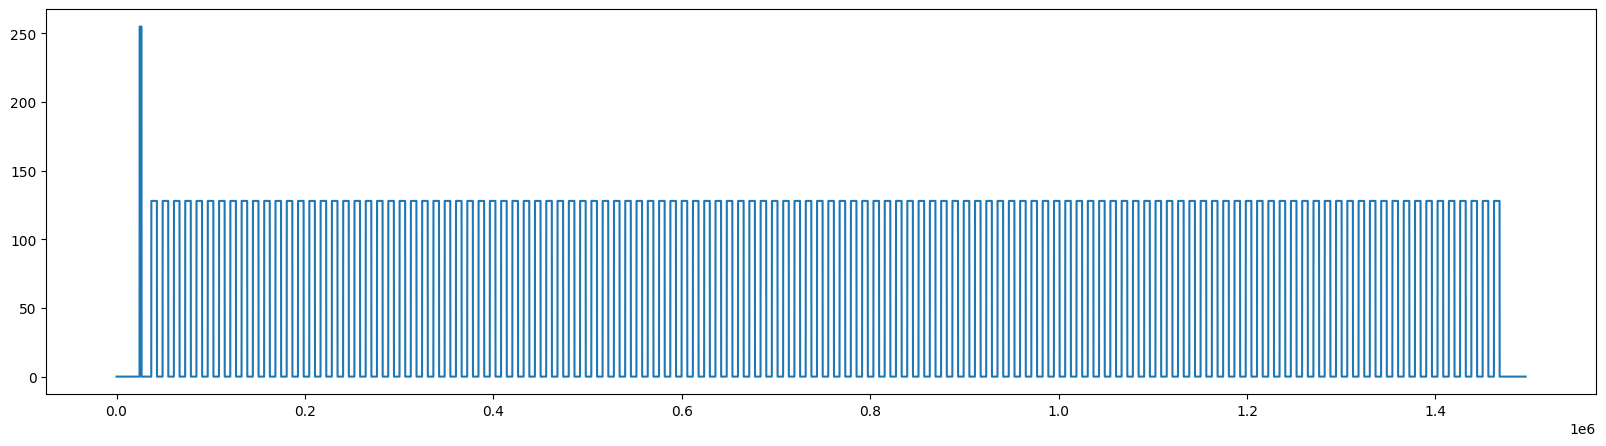

In [5]:
# Load the data from the file provided
#############################
# Your code goes here
dataFile = scipy.io.loadmat('sessionData.mat')
channelData = dataFile['channelData']
digitalByte = dataFile['digitalByte']
#############################

print("Size of channelData:",channelData.shape)
print("Size of digitalByte:",digitalByte.shape)

fig = plt.figure(figsize=(20, 5))
plt.plot(digitalByte)
plt.show()

# numbers = 0 
# for i in range(1, len(channelData)) :
#     if digitalByte[i]> 1 :
#         numbers = i
#         break
    
# print(numbers)



# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.<br>
<span style="color: green;"> This step involves filtering the signal of each region using a bandpass filter.The filter is designed to keep frequencies between 1 and 300 Hz while eliminating undesired noise and artifacts although most brain signals are less than 1 Hz but they dont have any special information. By applying this filter, the focus is on preserving the specific frequency range that is important for the analysis, particularly in neuroscience research. This range encompasses a diverse array of neural activity, including gamma oscillations and other frequencies that are pertinent to the analysis.</span>

2. Convert the signal to 120 stimulus trials using digitalByte.<br>
<span style="color: green;">The signal is divided into discrete segments aligned with specific stimulus events or time windows of interest. This segmentation is often done to analyze the neural activity in relation to specific experimental conditions or events.by making trials we make sure the output result will have same result for each trials and our model will be more accurate and reliable .</span>

3. Apply z-score normalization on each trial.<br>
<span style="color: green;">Z-score normalization, also known as standardization, is a common preprocessing step in which each trial's data is transformed to have a mean of zero and a standard deviation of one. This normalization allows for better comparison and interpretation of the data across trials. It helps to remove or reduce the impact of differences in the absolute magnitude or scale of the data, focusing instead on the relative variation within each trial. This step is particularly useful when comparing and analyzing data from different trials or subjects</span>

In [6]:
import numpy as np
from scipy import signal
# Preprocess - Bandpass Filter
def bandpass_filter(data, low_freq, high_freq):
    # Apply a bandpass filter on the data
    nyquist_freq = 0.5 * 2000
    low = low_freq / nyquist_freq
    high = high_freq / nyquist_freq
    b, a = signal.butter(4, [low, high], btype='band')
    filtered_data = signal.lfilter(b, a, data, axis=0)
    return filtered_data

def convert_to_trials(data, digitalByte):
    # Extract the trials of the signal
    #############################
    # Your code goes here
    trials = []
    # trials_1 = []
    # trials_2 = []
    for i in range(1, len(digitalByte)):
        if digitalByte[i] == 128 and digitalByte[i-1] == 0:
            trial = data[i:i+6000,:]
            trials.append(trial)
    return trials
    #############################
    

# Preprocess - Z-Score
def z_score(data):
    # Calculate the z-score for the data and return the results
    mean = np.mean(data)
    std = np.std(data)
    z_scored_data = (data - mean) / std
    return z_scored_data

# Step 1: Apply bandpass filter
filtered_data = bandpass_filter(channelData, 1, 300)
# Step 2: Convert to trials
trials = convert_to_trials(filtered_data, digitalByte)
# Step 3: Apply z-score normalization on each trial
z_scored_trials = [z_score(trial) for trial in trials]
# print(np.asarray(z_scored_trials).shape)
# timepoints = np.arange(len(np.asarray(z_scored_trials)))
# plt.figure()
# plt.plot(timepoints, np.asarray(z_scored_trials)[:,:,0])
# plt.title('Hippocampus ERP')

# plt.figure()
# plt.plot(timepoints, np.asarray(z_scored_trials)[:,:,1])
# plt.title('MPFC ERP')

# plt.figure()
# plt.plot(timepoints, np.asarray(z_scored_trials)[:,:,2])
# plt.title('Ventral Striatum ERP')

# plt.show()

 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

Your answer:<br>
<span style="color: green;"><br>
**Hippocampus:** The hippocampus is a deep region located in the middle part of the brain, called the medial temporal lobe. It helps us with memory formation and learning. It takes short-term memories and turns them into long-term memories, so we can remember things from the past. It also helps us with spatial memory, so we can remember places and find our way around.<br>
<br>
**mPFC (medial Prefrontal Cortex):** The mPFC is a part of the brain located in the front area, specifically in the front part of the brain called the prefrontal cortex. It is involved in important mental activities like decision-making, controlling our emotions, social behavior, and thinking about ourselves. The mPFC helps us understand our own thoughts and feelings, make choices, and think about right and wrong. It also helps us manage our emotions and understand other people's emotions.<br>
<br>
**Ventral Striatum:** The ventral striatum is a deep region in the brain, part of a group of structures called the basal ganglia. Its main job is to process rewards and motivate us to do things. When we experience something rewarding, like eating something delicious or winning a game, the ventral striatum is involved in making us feel good and reinforcing that behavior. It helps us feel motivated to seek out rewards and make decisions based on what we find pleasurable.<br>
<br>
These brain regions, along with many others, work together in complex networks to support our thinking, emotions, and behaviors.
</span>

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer:<br>
<span style="color: green;">
ERP stands for Event-Related Potential, which is a measure used in neuroscience to analyze and understand neural activity in response to specific events or stimuli. It refers to the average electrical activity of the brain recorded from multiple trials or repetitions of the same experimental task.
</span>

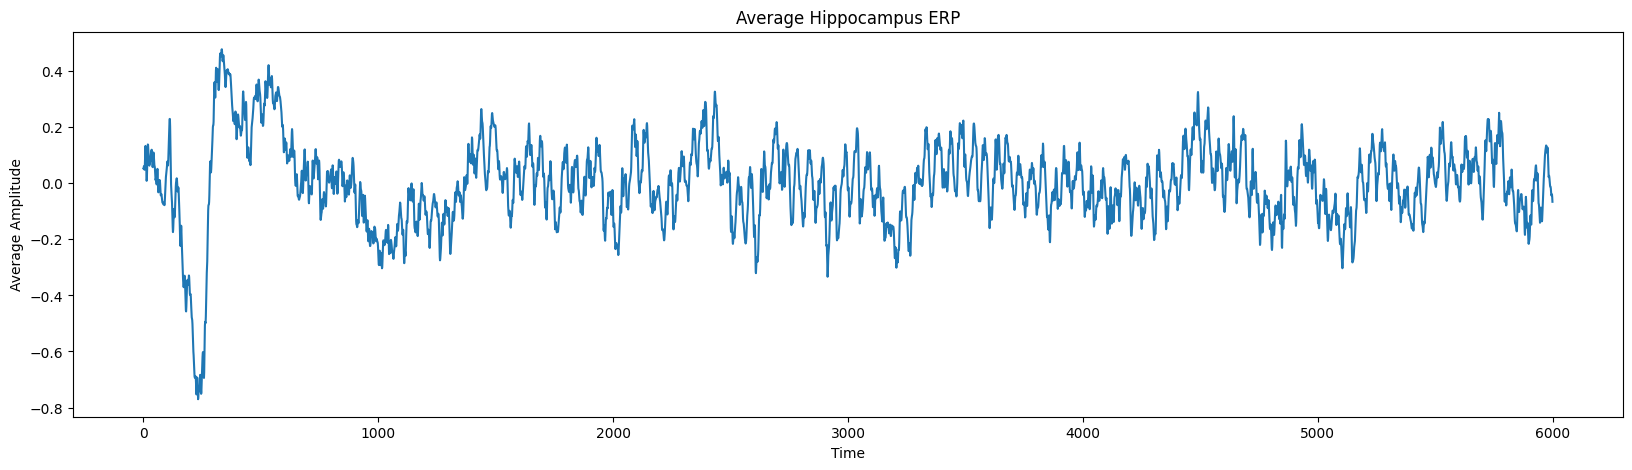

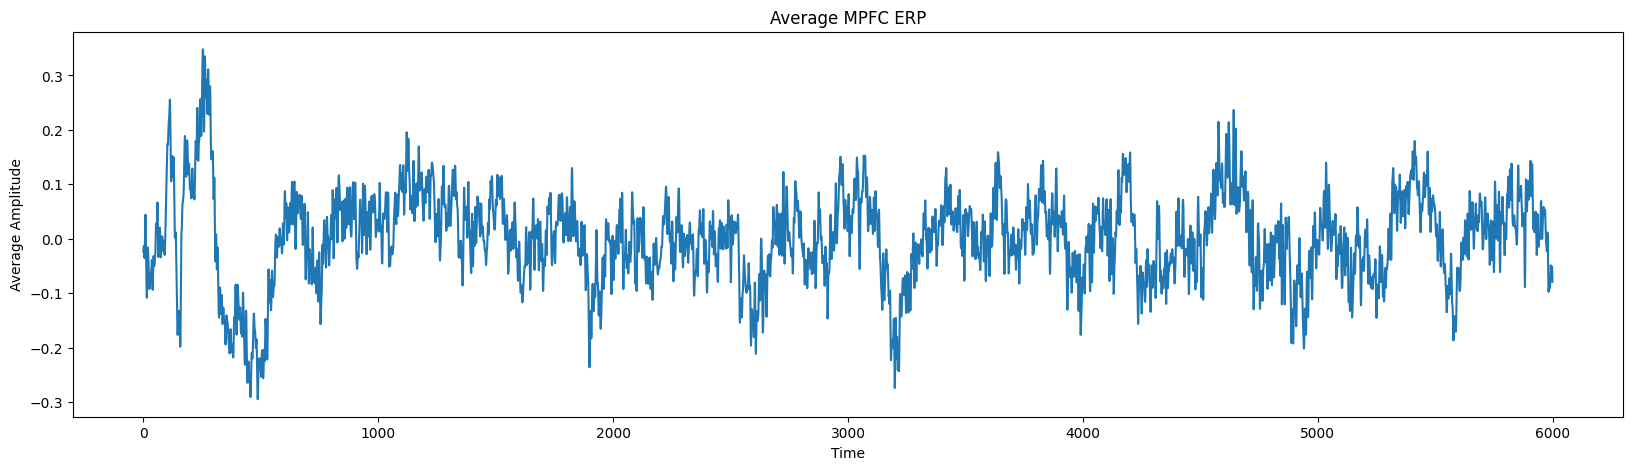

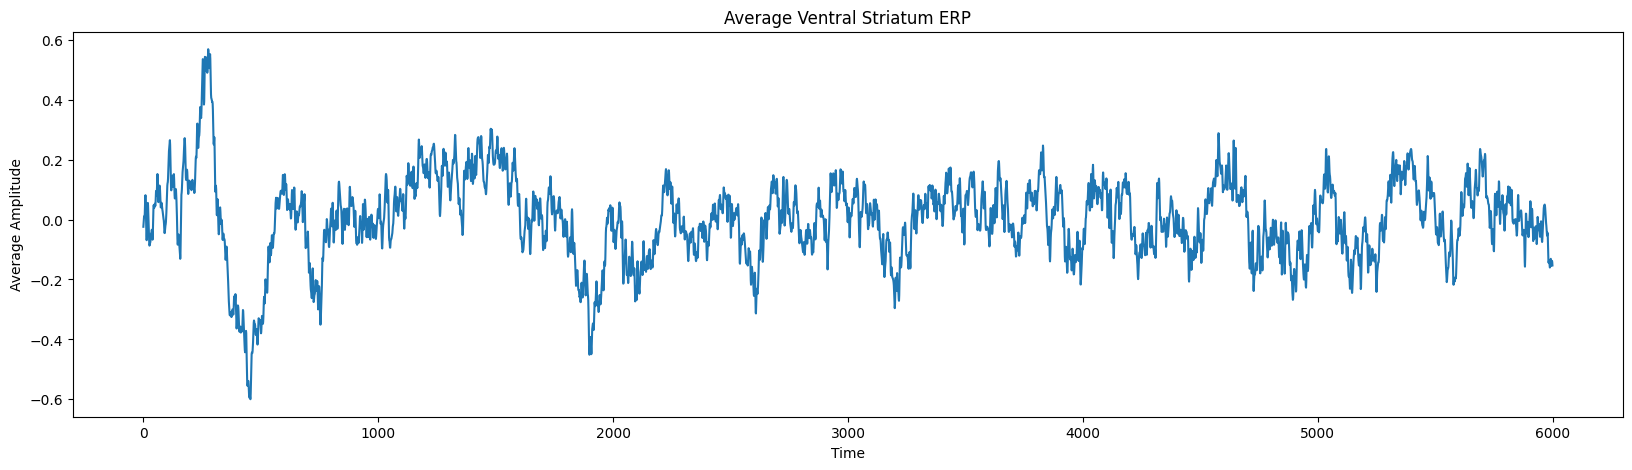

In [7]:
#ERP calculation
def ERP_calc(data):
    # Calsulate the ERP of the data
    #############################
    erp = np.mean(data, axis=0)
    return erp

# Convert z_scored_trials to a NumPy array
z_scored_trials = np.array(z_scored_trials)

# Calculate the average ERP across trials for each brain part
hippocampus_avg_erp = np.mean(z_scored_trials[:, :, 0], axis=0)
mpfc_avg_erp = np.mean(z_scored_trials[:, :, 1], axis=0)
ventral_striatum_avg_erp = np.mean(z_scored_trials[:, :, 2], axis=0)

# x_axis = np.arange(1, num_trials + 1)
x_axis = np.arange(len(hippocampus_avg_erp))

# Plot the average ERP for each brain part in separate plots
plt.figure(figsize=(20, 5))
plt.plot(x_axis, hippocampus_avg_erp)
plt.xlabel('Time')
plt.ylabel('Average Amplitude')
plt.title('Average Hippocampus ERP')

plt.figure(figsize=(20, 5))
plt.plot(x_axis, mpfc_avg_erp)
plt.xlabel('Time')
plt.ylabel('Average Amplitude')
plt.title('Average MPFC ERP')

plt.figure(figsize=(20, 5))
plt.plot(x_axis, ventral_striatum_avg_erp)
plt.xlabel('Time')
plt.ylabel('Average Amplitude')
plt.title('Average Ventral Striatum ERP')

plt.show()

# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

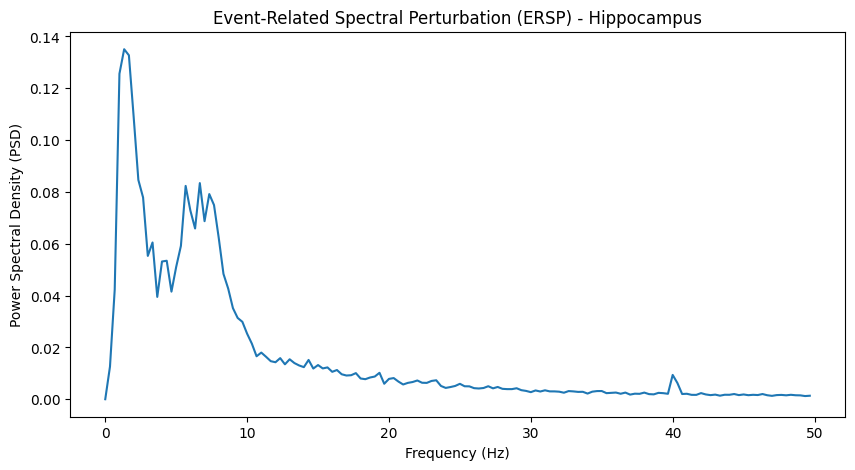

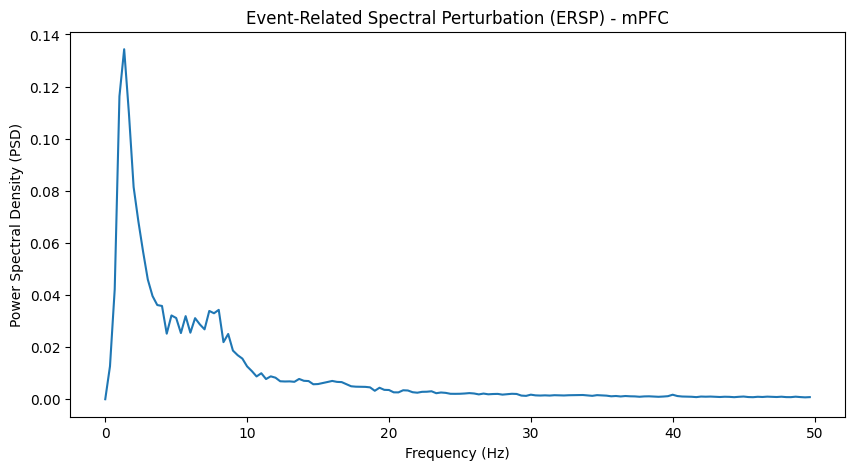

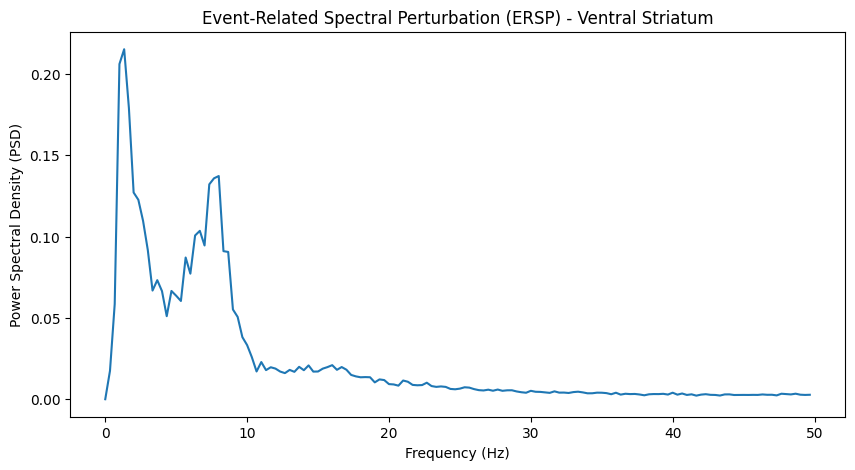

In [8]:
from scipy import signal
def PSD(data, sample_rate):
    frequencies, psd = signal.periodogram(data, fs=sample_rate)
    return frequencies, psd

def ERSP(trials, sample_rate):
    ersp_list = []
    
    for i in range(120):
        frequencies, psd = PSD(trials[i], sample_rate)
        ersp_list.append(psd)
    
    ersp_avg = np.mean(ersp_list, axis=0)
    return frequencies, ersp_avg

sample_rate = 2000

hippocampus_frequencies, hippocampus_ersp = ERSP(z_scored_trials[:, :, 0], sample_rate)
mpfc_frequencies, mpfc_ersp = ERSP(z_scored_trials[:, :, 1], sample_rate)
ventral_striatum_frequencies, ventral_striatum_ersp = ERSP(z_scored_trials[:, :, 2], sample_rate)


# Plot ERSP for each brain part
plt.figure(figsize=(10, 5))
plt.plot(hippocampus_frequencies[:150], hippocampus_ersp[:150])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Event-Related Spectral Perturbation (ERSP) - Hippocampus')

plt.figure(figsize=(10, 5))
plt.plot(mpfc_frequencies[:150], mpfc_ersp[:150])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Event-Related Spectral Perturbation (ERSP) - mPFC')

plt.figure(figsize=(10, 5))
plt.plot(ventral_striatum_frequencies[:150], ventral_striatum_ersp[:150])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Event-Related Spectral Perturbation (ERSP) - Ventral Striatum')

plt.show()

### Results Explanation 
<span style="color: green;">
I think The peak around 0_10 Hz could indicate that the neural activity in the brain regions that we analyzed (hippocampus, mPFC, and ventral striatum) is particularly prominent or synchronized at this frequency. It may represent a natural oscillatory rhythm or a frequency band associated with the cognitive or physiological processes under investigation.the peak around 10 Hz could indicate that the brain regions we studied are entrained by or synchronized with the frequency of the stimulus or task. Entrainment refers to the alignment of neural activity with an external rhythm or periodicity, and it can be observed as an increase in power at the entrained frequency.
</span>

Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

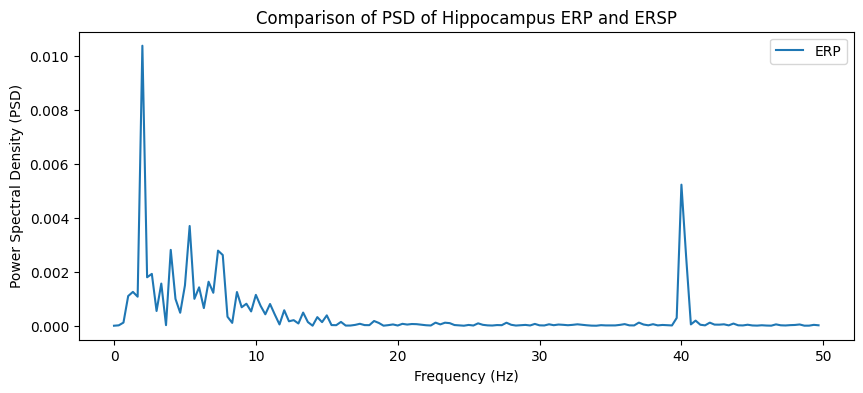

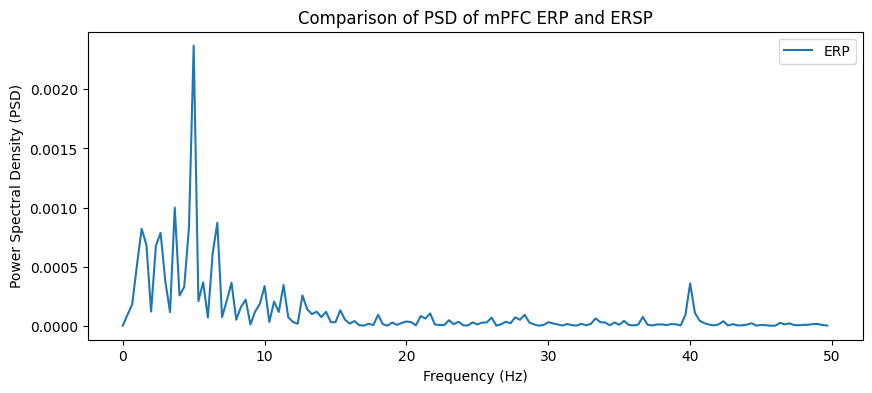

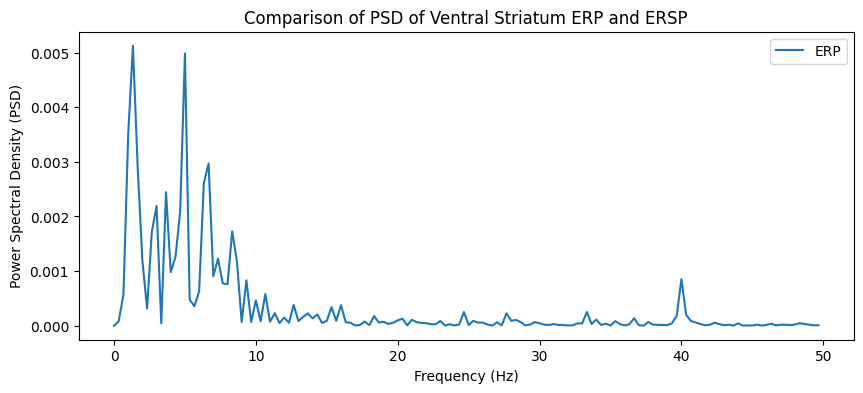

In [9]:


# Calculate the PSD of the ERPs for each brain part
hippocampus_freq, hippocampus_psd = PSD(hippocampus_avg_erp, sample_rate)
mpfc_freq, mpfc_psd = PSD(mpfc_avg_erp, sample_rate)
ventral_striatum_freq, ventral_striatum_psd = PSD(ventral_striatum_avg_erp, sample_rate)

# Plot PSD of ERP for each brain part
plt.figure(figsize=(10, 4))
plt.plot(hippocampus_freq[:150], hippocampus_psd[:150], label='ERP')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Comparison of PSD of Hippocampus ERP and ERSP')
plt.legend()

plt.figure(figsize=(10, 4))
plt.plot(mpfc_freq[:150], mpfc_psd[:150], label='ERP')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Comparison of PSD of mPFC ERP and ERSP')
plt.legend()

plt.figure(figsize=(10, 4))
plt.plot(ventral_striatum_freq[:150], ventral_striatum_psd[:150], label='ERP')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Comparison of PSD of Ventral Striatum ERP and ERSP')
plt.legend()

plt.show()

### Results Explanation 
<span style="color: green;">As we see in figures when we calculate the PSD of averaged trials, we take the signals from multiple trials and combine them together before analyzing their PSD. This is like taking the average of different measurements to get a more representative result. By doing this, we can reduce the impact of random noise that might be present in individual trials. It's similar to smoothing out the data to obtain a cleaner and more reliable estimate of the PSD. However, while this approach helps to reduce noise, it can also inadvertently smooth out finer details and dynamic aspects of the signal. Think of it as a trade-off: we get a cleaner representation, but we might lose some of the intricate nuances in the process. The resulting PSD may appear less sharp or less detailed compared to the PSDs of individual trials.
<br>
<br>
On the other hand, when we average the PSDs of individual trials, we take a different route. Instead of combining the trials beforehand, we analyze each trial separately and calculate the PSD for each one. We then take the average of these individual PSD estimates. This approach allows us to capture the unique characteristics and fluctuations present in each trial. It's like appreciating the individuality of each trial and considering their collective contribution. By doing so, we retain the transient and non-stationary aspects of the signal, such as brief and momentary changes or patterns. However, this method requires more computational effort since we have to process each trial separately. Additionally, averaging the PSDs of successive samples helps to reduce variability in the PSD estimate. In simpler terms, it's like combining multiple perspectives to obtain a more stable and consistent result.

</span>

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer:
<span style="color: green;"><br>
Functional connectivity (FC) is like exploring the conversations and coordination between different regions of the brain. It's about how these regions communicate and synchronize their activities over time. One important aspect of FC is phase_phase coupling, which refers to the synchronization of the phase of neural oscillations between brain regions. To measure this coupling, researchers often use two methods: phase locking value (PLV) and phase lag index (PLI).<br>
PLV looks at the consistency of phase relationships between brain regions over time. It tells us how well the phase of oscillatory activity in one region aligns with the phase of oscillatory activity in another region. PLV scores range from 0 to 1, with 0 meaning no phase coupling and 1 indicating perfect synchronization. PLV can detect both types of phase coupling: zero-lag and non_zero_lag.<br>
On the other hand, PLI focuses on spotting non_zero_lag phase coupling, which is believed to reflect true connectivity. It measures the asymmetry of phase differences between two brain regions and is not influenced by zero_lag phase coupling. PLI scores also range from 0 to 1, with 0 representing no phase coupling and values close to 1 suggesting strong non_zero_lag synchronization.<br>
When comparing PLV and PLI, both measures provide insights into phase-phase coupling and help us understand functional connectivity. However, they have different strengths when it comes to different types of phase coupling. PLV captures both zero-lag and non_zero_lag coupling, while PLI specifically focuses on non_zero_lag synchronization. This makes PLI more suitable for identifying genuine connectivity patterns between brain regions.<br>
Choosing between PLV and PLI depends on the specific research question and the characteristics of the data. If we're interested in overall phase synchronization, including zero_lag coupling, PLV might be a better choice. But if we want to detect non_zero_lag phase synchronization and uncover true connectivity patterns, PLI is the way to go As I said it depends on what our purposes are.
</span>

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

<span style="color: green;">
wPLI and PLI differ in how they calculate phase differences and their sensitivity to volume conduction. PLI focuses on the asymmetry of phase differences to find true connections, while wPLI includes the magnitudes of phase differences to measure both strength and directionality.
<br>

**Calculation Method:**<br>
PLI: PLI looks at how the phase differences between two brain regions are different from zero. It calculates the proportion of time points where the phase difference is not zero.<br>
wPLI: wPLI is similar to PLI, but it also considers how big the phase differences are. It calculates a weighted average of the phase differences, taking into account their magnitudes.

**Sensitivity to Volume Conduction:**<br>
PLI: PLI tries to be less affected by volume conduction, which is when signals from different brain areas mix together and make it harder to find true connections. It focuses on capturing only the genuine phase coupling between regions.<br>
wPLI: wPLI is more sensitive to volume conduction compared to PLI. It takes into account the strength of the phase differences, which can be influenced by volume conduction and other sources of noise.

**Interpretation:**<br>
PLI: PLI values range from 0 to 1. A value of 0 means no phase coupling, and values close to 1 indicate strong non-zero-lag phase synchronization. PLI helps identify true connections between brain regions.<br>
wPLI: Like PLI, wPLI values also range from 0 to 1. Higher values mean stronger phase coupling. wPLI is useful for measuring the strength of phase connections while considering both the asymmetry of phase differences and their magnitudes.
</span>

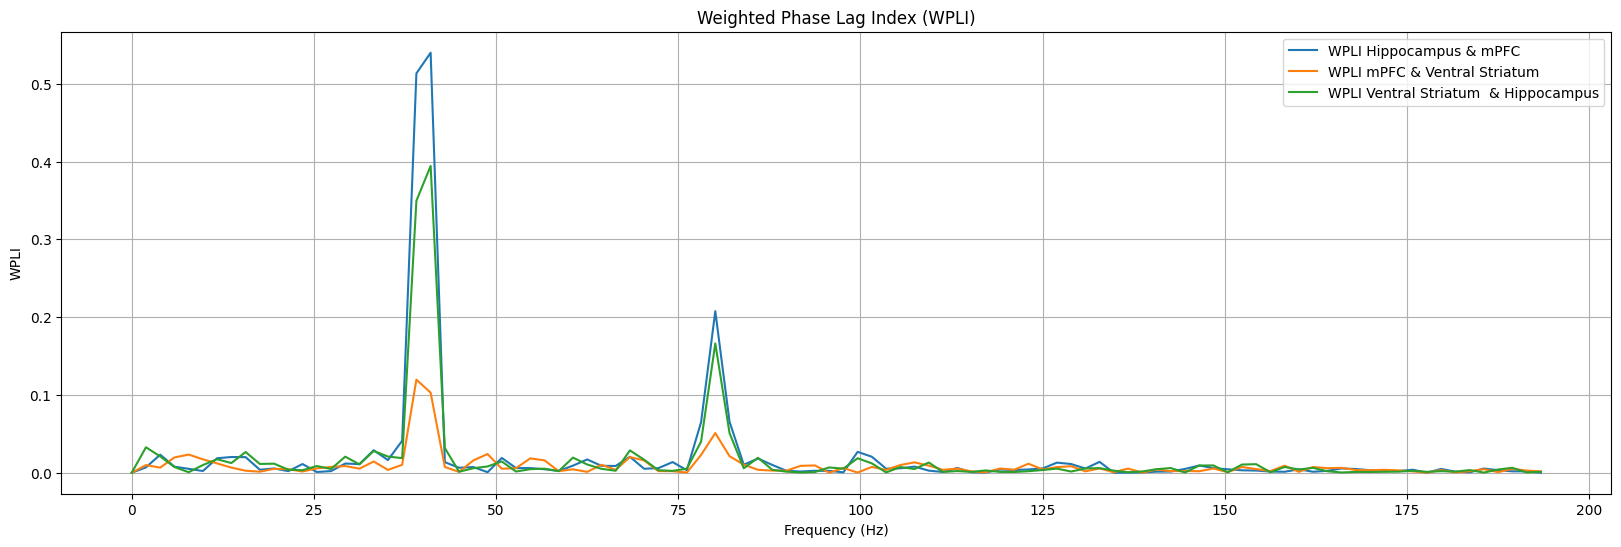

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import csd

# WPLI
def WPLI(data,region1,region2):
#############################
# Your code goes here
    Num ,ANum = np.zeros((2, 513))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            freq, csd_value = csd(data[i,:,region1], data[j,:,region2], 2000, nperseg = 1024)
            Num += np.imag(csd_value)
            ANum += np.abs(np.imag(csd_value))
    wpli = np.abs(Num) / (ANum + 1e-10)
    return freq, wpli
def process_regions_data(data):
    f_12, wpli_12 = WPLI(data, 0, 1)
    f_23, wpli_23 = WPLI(data, 1, 2)
    f_31, wpli_31 = WPLI(data, 2, 0)
    return f_12, f_23, f_31, wpli_12, wpli_23, wpli_31
#############################
f_12, f_23, f_31, wpli_12, wpli_23, wpli_31 = process_regions_data(z_scored_trials)
# Plot WPLI values for each pair of signals
plt.figure(figsize=(20, 6))
plt.plot(f_12[0:100], wpli_12[0:100], label='WPLI Hippocampus & mPFC')
plt.plot(f_23[0:100], wpli_23[0:100], label='WPLI mPFC & Ventral Striatum')
plt.plot(f_31[0:100], wpli_31[0:100], label='WPLI Ventral Striatum  & Hippocampus')
plt.xlabel('Frequency (Hz)')
plt.ylabel('WPLI')
plt.title('Weighted Phase Lag Index (WPLI)')
plt.grid(True)
plt.legend()
plt.show()